# Plot the sea temperature data on a Map

- Use the orthographic projection
- Use the the last time step
- Use Honolullu Hawai as the projection center (21.3000° N, 157.8167° W)

In [27]:
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma

filename = "tos_O1_2001-2002.nc"
ds = Dataset(filename, mode="r")

In [28]:
time = ds.variables['time']
sst = ds.variables['tos']
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]


In [29]:
%matplotlib inline

import matplotlib.pyplot as plt


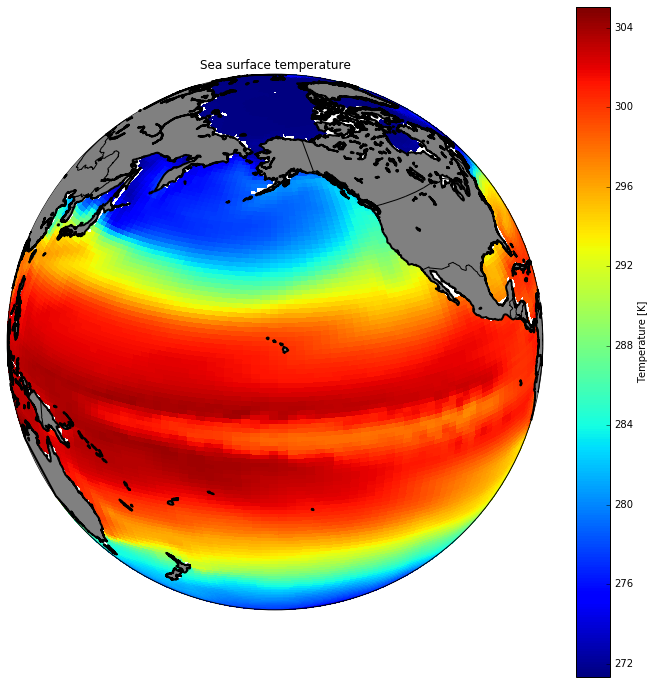

In [30]:
from mpl_toolkits.basemap import Basemap

fig=plt.figure(figsize=(12,12))

lat0 = 21.3
lon0 = -157.8167
# Create the map
m = Basemap(lat_0=lat0, lon_0=lon0, projection='ortho',resolution='l')

m.drawcoastlines(linewidth=2)
m.fillcontinents(color='gray')
m.drawcountries(linewidth=1)

plons, plats = np.meshgrid(lons, lats)
x, y = m(plons, plats)
cp = m.pcolor(x,y,sst[-1,:,:])
cbar = plt.colorbar(cp)
cbar.set_label("Temperature [K]")
plt.title("Sea surface temperature")
plt.show()